# Przetwarzanie Grafiki i Muzyki - laboratorium nr 8

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Morfologia matematyczna.


W morfologii matematycznej operacje są dwuargumentowe:

  * Pierwszym argumentem jest obraz do przetworzenia.
  * Drugim argumentem jest mniejszy obraz: element strukturalny.

# Erozja

Erozja jest zastosowaniem sumy Minkowskiego do obrazów cyfrowych

  * Pierwszym argumentem jest obraz
  * Drugim element strukturalny
  * Zasada działania:
    * Do każdego piksela obrazu przykłada się element strukturalny (SE) w jego punkcie centralnym
    * Jeśli choć jeden piksel sąsiedztwa przykryty przez SE ma wartość '0', piksel bieżący też przyjmuje wartość '0' (tła)

## Zadanie 1 (1 punkt)

* Proszę dokonać binaryzacji obrazu FIG_512 za pomocą algorytmu Otsu.
* Proszę wykonać erozję na binarnej wersji obrazka z elementami strukturalnymi:

$$
\begin{bmatrix} 
0 & 1 & 0 \\
1 & 1 & 1 \\
0 & 1 & 0
\end{bmatrix} 
$$

$$
\begin{bmatrix} 
0 & 0 & 1 & 0 & 0 \\
0 & 1 & 1 & 1 & 0 \\
1 & 1 & 1 & 1 & 1 \\
0 & 1 & 1 & 1 & 0 \\
0 & 0 & 1 & 0 & 0
\end{bmatrix} 
$$

* Proszę narysować różnice obrazów przed i po erozji (proszę nie pomylić kolejności).

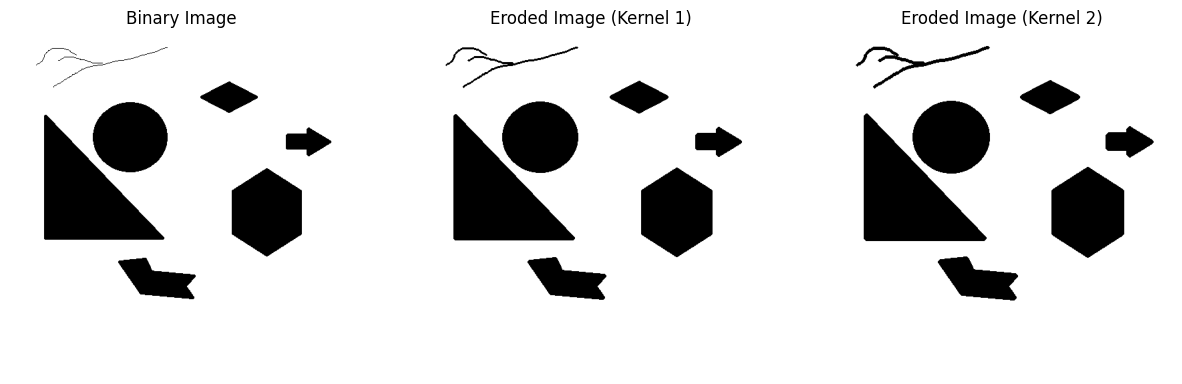

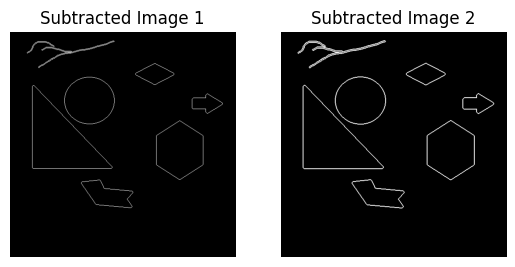

In [4]:
image = cv2.imread('./img/FIG_512.png', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
kernel1 = np.array([[0, 1, 0],
                    [1, 1, 1],
                    [0, 1, 0]], dtype=np.uint8)

kernel2 = np.array([[0, 0, 1, 0, 0],
                    [0, 1, 1, 1, 0],
                    [1, 1, 1, 1, 1],
                    [0, 1, 1, 1, 0],
                    [0, 0, 1, 0, 0]], dtype=np.uint8)

eroded_image1 = cv2.erode(binary_image, kernel1)
eroded_image2 = cv2.erode(binary_image, kernel2)
img_sub1 = cv2.subtract(image, eroded_image1)
img_sub2 = cv2.subtract(image, eroded_image2)

plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(eroded_image1, cmap='gray')
plt.title('Eroded Image (Kernel 1)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(eroded_image2, cmap='gray')
plt.title('Eroded Image (Kernel 2)')
plt.axis('off')

plt.show()

plt.subplot(1, 2, 1)
plt.imshow(img_sub1, cmap='gray')
plt.title('Subtracted Image 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_sub2, cmap='gray')
plt.title('Subtracted Image 2')
plt.axis('off')

plt.show()




# Zadanie 2 (1 punkt)

* Proszę dokonać binaryzacji obrazu LENA_512 za pomocą algorytmu Otsu.
* Proszę wykonać erozję na binarnej wersji obrazka z elementami strukturalnymi:

$$
\begin{bmatrix} 
0 & 1 & 0 \\
1 & 1 & 1 \\
0 & 1 & 0
\end{bmatrix} 
$$

$$
\begin{bmatrix} 
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{bmatrix} 
$$

* Proszę narysować różnice obrazów prze i po erozji (proszę nie pomylić kolejności).

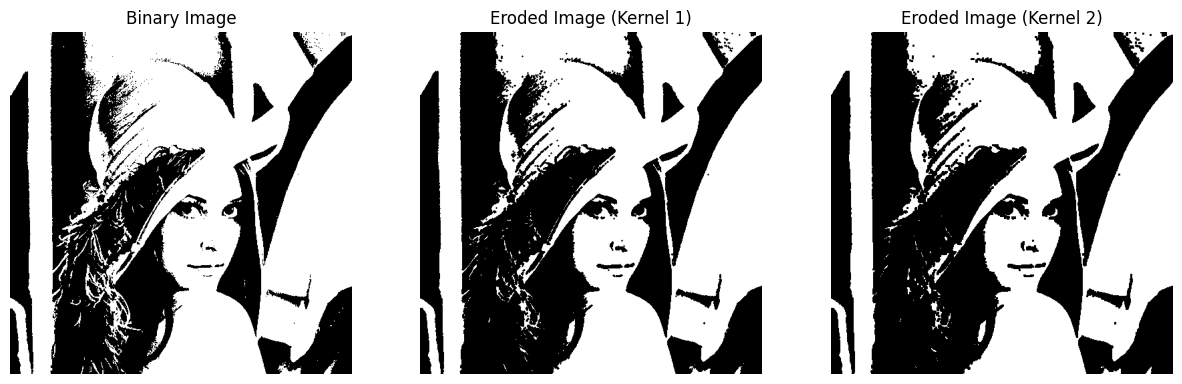

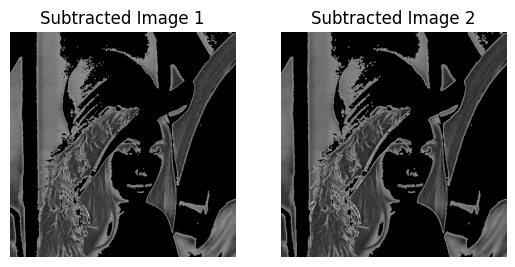

In [3]:
image = cv2.imread('./img/LENA_512.jpg', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
kernel1 = np.array([[0, 1, 0],
                    [1, 1, 1],
                    [0, 1, 0]], dtype=np.uint8)

kernel2 = np.array([[1, 1, 1],
                    [1, 1, 1],
                    [1, 1, 1]], dtype=np.uint8)

eroded_image1 = cv2.erode(binary_image, kernel1)
eroded_image2 = cv2.erode(binary_image, kernel2)
img_sub1 = cv2.subtract(image, eroded_image1)
img_sub2 = cv2.subtract(image, eroded_image2)

plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(eroded_image1, cmap='gray')
plt.title('Eroded Image (Kernel 1)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(eroded_image2, cmap='gray')
plt.title('Eroded Image (Kernel 2)')
plt.axis('off')

plt.show()

plt.subplot(1, 2, 1)
plt.imshow(img_sub1, cmap='gray')
plt.title('Subtracted Image 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_sub2, cmap='gray')
plt.title('Subtracted Image 2')
plt.axis('off')

plt.show()




# Zadanie 3 (2 punkty)

  * Zdefiniujmy okrągły element strukturalny o promieniu r:
$$
B_r=\{ (x_1,x_2) \in \mathbb{R}^2 \colon x_{1}^2+x_{2}^2<r^2 \}
$$
  * Proszę dokonać binaryzacji obrazu LENA_512 za pomocą algorytmu Otsu, dla $r=2,3,4,5,6,7$

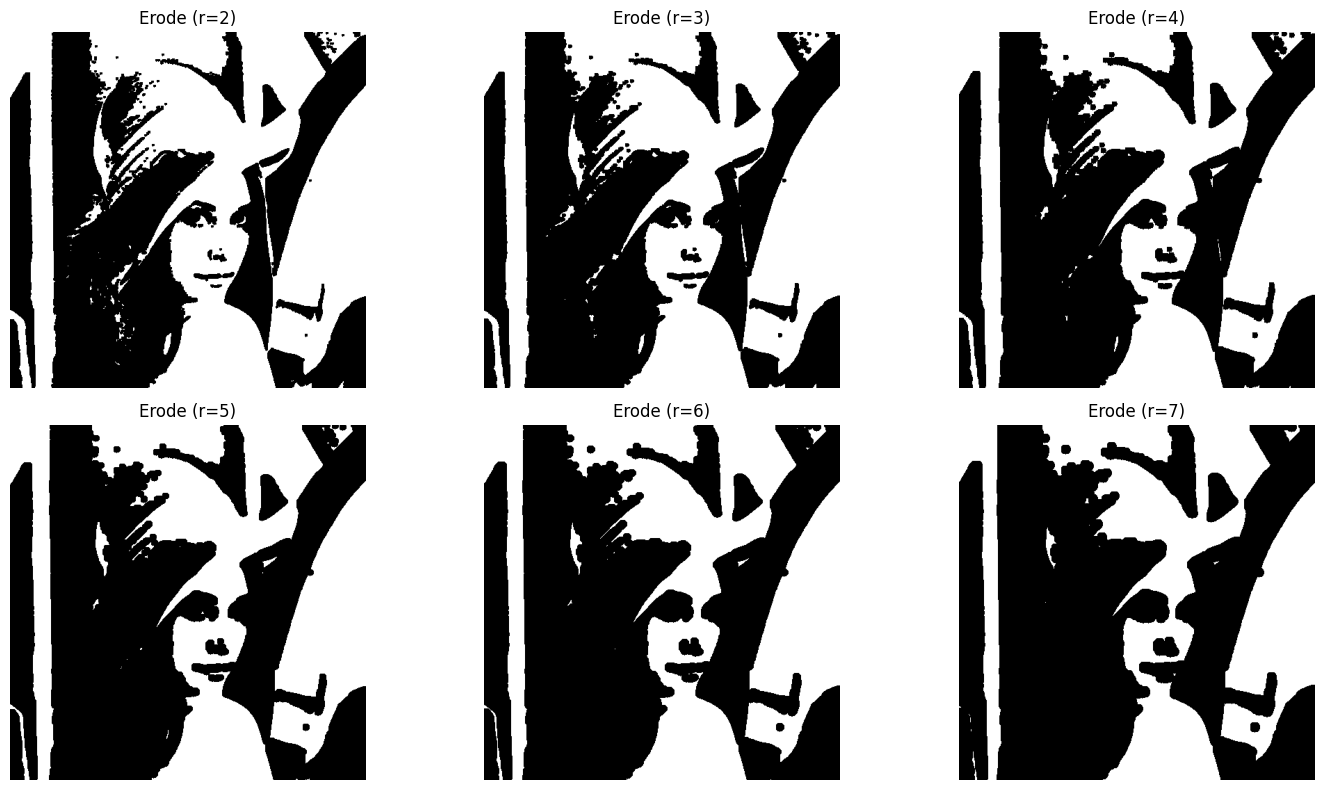

In [9]:
lena_image = cv2.imread('./img/LENA_512.jpg', cv2.IMREAD_GRAYSCALE)
ret, img_bin = cv2.threshold(lena_image, 100, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
r_list = [2, 3, 4, 5, 6, 7]

output = []
for r in r_list:
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2 * r, 2 * r))
    img_erode = cv2.erode(img_bin, kernel)
    output.append(img_erode)

plt.figure(figsize=(15, 8))
for i, erode in enumerate(output, 1):
    plt.subplot(2, 3, i)
    plt.imshow(erode, cmap='gray')
    plt.title(f'Erode (r={r_list[i-1]})')
    plt.axis('off')

plt.tight_layout()
plt.show()


# Dylacja

  * Operacja dylacji jest zastosowaniem sumy Minkowskiego do obrazów cyfrowych
  * Pierwszym argumentem jest obraz
  * Drugim element strukturalny
  * Zasada działania:
    * Do każdego piksela obrazu przykłada się element strukturalny (SE) w jego punkcie centralnym
    * Jeśli choć jeden piksel sąsiedztwa przykryty przez SE ma wartość '1', piksel bieżący też przyjmuje wartość '1' (obiektu pierwszoplanowego)


## Zadanie 4 (1 punkt)
Proszę wykonać ćwiczenie 1 dla dylacji.

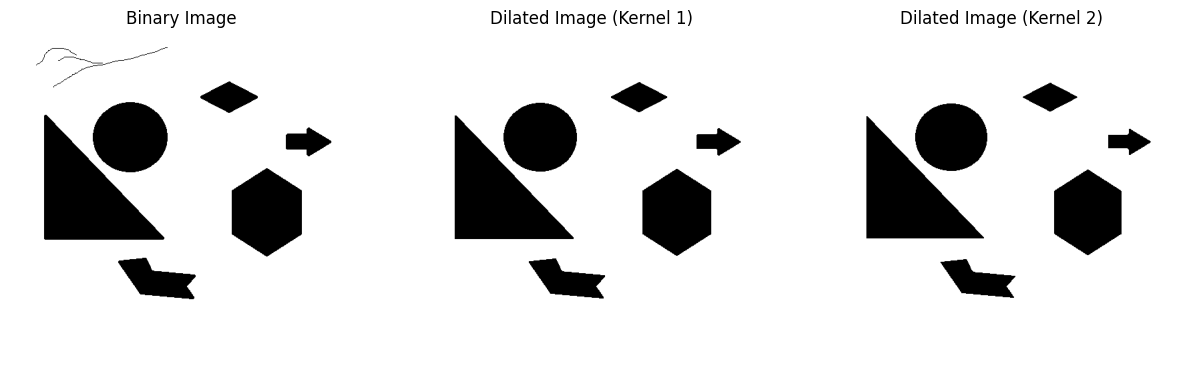

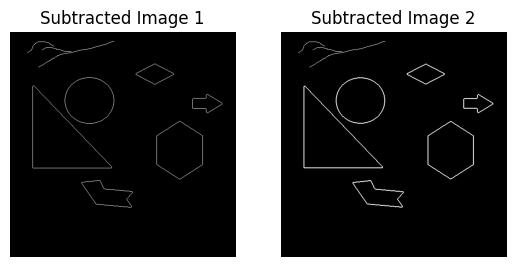

In [4]:
image = cv2.imread('./img/FIG_512.png', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
kernel1 = np.array([[0, 1, 0],
                    [1, 1, 1],
                    [0, 1, 0]], dtype=np.uint8)

kernel2 = np.array([[0, 0, 1, 0, 0],
                    [0, 1, 1, 1, 0],
                    [1, 1, 1, 1, 1],
                    [0, 1, 1, 1, 0],
                    [0, 0, 1, 0, 0]], dtype=np.uint8)

dil_image1 = cv2.dilate(binary_image, kernel1)
dil_image2 = cv2.dilate(binary_image, kernel2)
img_sub1 = cv2.subtract(dil_image1, image)
img_sub2 = cv2.subtract(dil_image2, image)

plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(dil_image1, cmap='gray')
plt.title('Dilated Image (Kernel 1)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(dil_image2, cmap='gray')
plt.title('Dilated Image (Kernel 2)')
plt.axis('off')

plt.show()

plt.subplot(1, 2, 1)
plt.imshow(img_sub1, cmap='gray')
plt.title('Subtracted Image 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_sub2, cmap='gray')
plt.title('Subtracted Image 2')
plt.axis('off')

plt.show()




## Zadanie 5 (1 punkt)
Proszę wykonać ćwiczenie 2 dla dylacji.

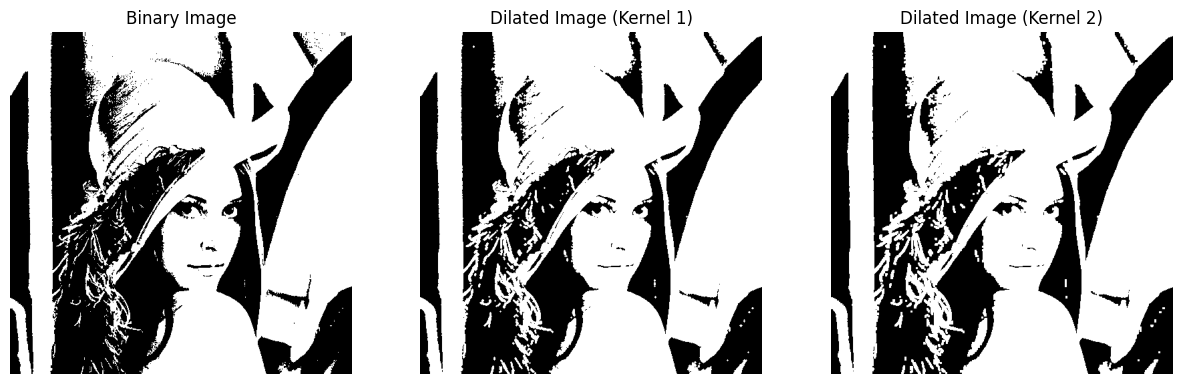

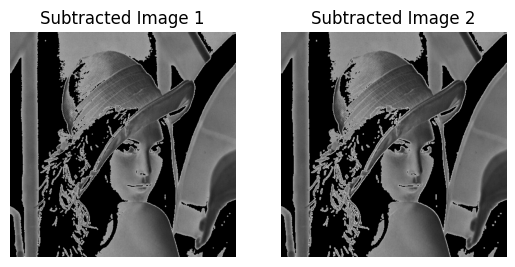

In [6]:
image = cv2.imread('./img/LENA_512.jpg', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
kernel1 = np.array([[0, 1, 0],
                    [1, 1, 1],
                    [0, 1, 0]], dtype=np.uint8)

kernel2 = np.array([[1, 1, 1],
                    [1, 1, 1],
                    [1, 1, 1]], dtype=np.uint8)

dil_image1 = cv2.dilate(binary_image, kernel1)
dil_image2 = cv2.dilate(binary_image, kernel2)
img_sub1 = cv2.subtract(dil_image1, image)
img_sub2 = cv2.subtract(dil_image2, image)

plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(dil_image1, cmap='gray')
plt.title('Dilated Image (Kernel 1)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(dil_image2, cmap='gray')
plt.title('Dilated Image (Kernel 2)')
plt.axis('off')

plt.show()

plt.subplot(1, 2, 1)
plt.imshow(img_sub1, cmap='gray')
plt.title('Subtracted Image 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_sub2, cmap='gray')
plt.title('Subtracted Image 2')
plt.axis('off')

plt.show()




# Operacja otwarcia i zamknięcia

## Zadanie 6 (1 punkt)
Proszę wykonać operację otwarcia na FIG_512 (najpierw erozja, a potem dylacja), dla okrągłego elementu strukturalnego o promieniach r=2,5,7,20.


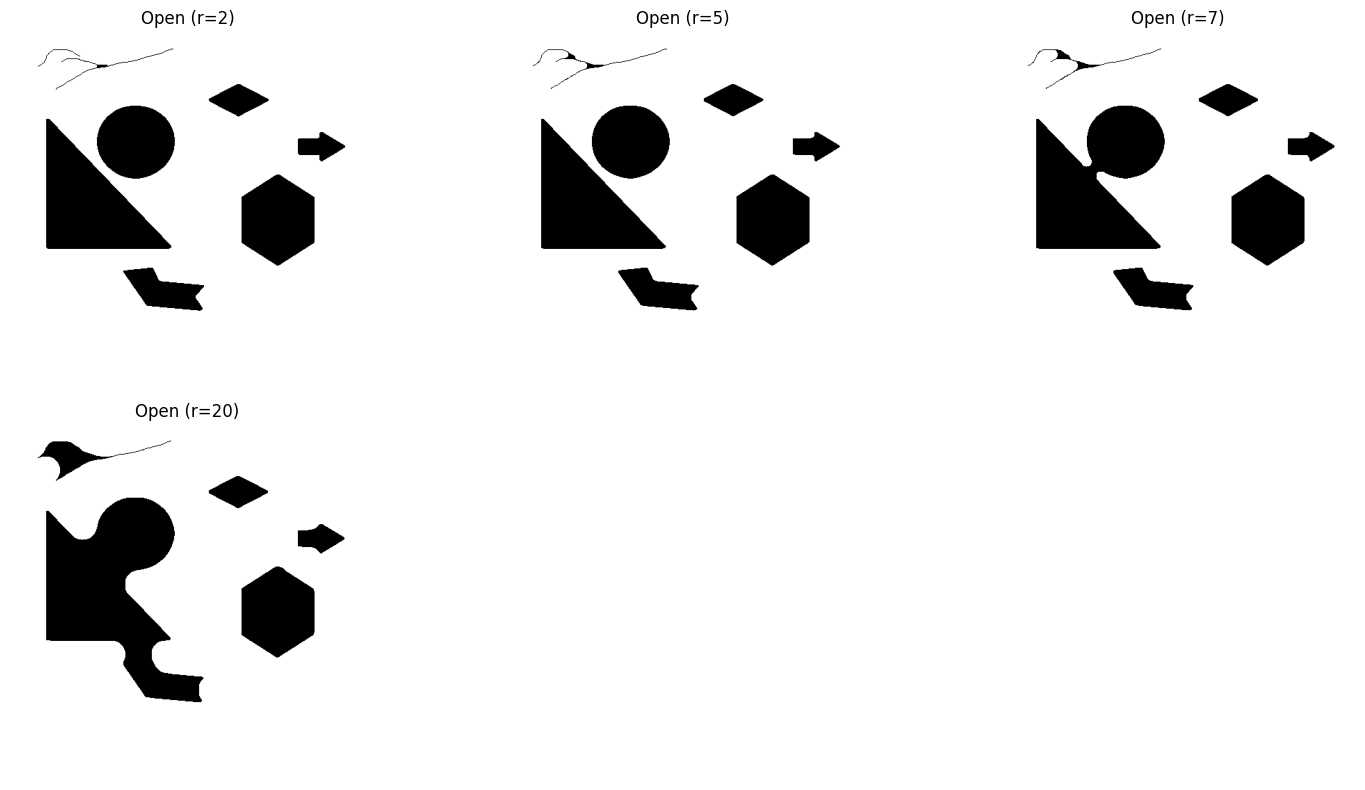

In [10]:
img = cv2.imread('./img/FIG_512.png', cv2.IMREAD_GRAYSCALE)
ret, img_bin = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

r_list = [2, 5, 7, 20]
output = []
for r in r_list:
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2 * r, 2 * r))
    img_open = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernel)
    output.append(img_open)

plt.figure(figsize=(15, 8))
for i, img_open in enumerate(output, 1):
    plt.subplot(2, 3, i)
    plt.imshow(img_open, cmap='gray')
    plt.title(f'Open (r={r_list[i-1]})')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Zadanie 7 (1 punkt)
Proszę wykonać operację zamknięcia na FIG_512 (najpierw dylacja, potem erozja), dla okrągłego elementu strukturalnego o promieniach r=2,5,7,20.

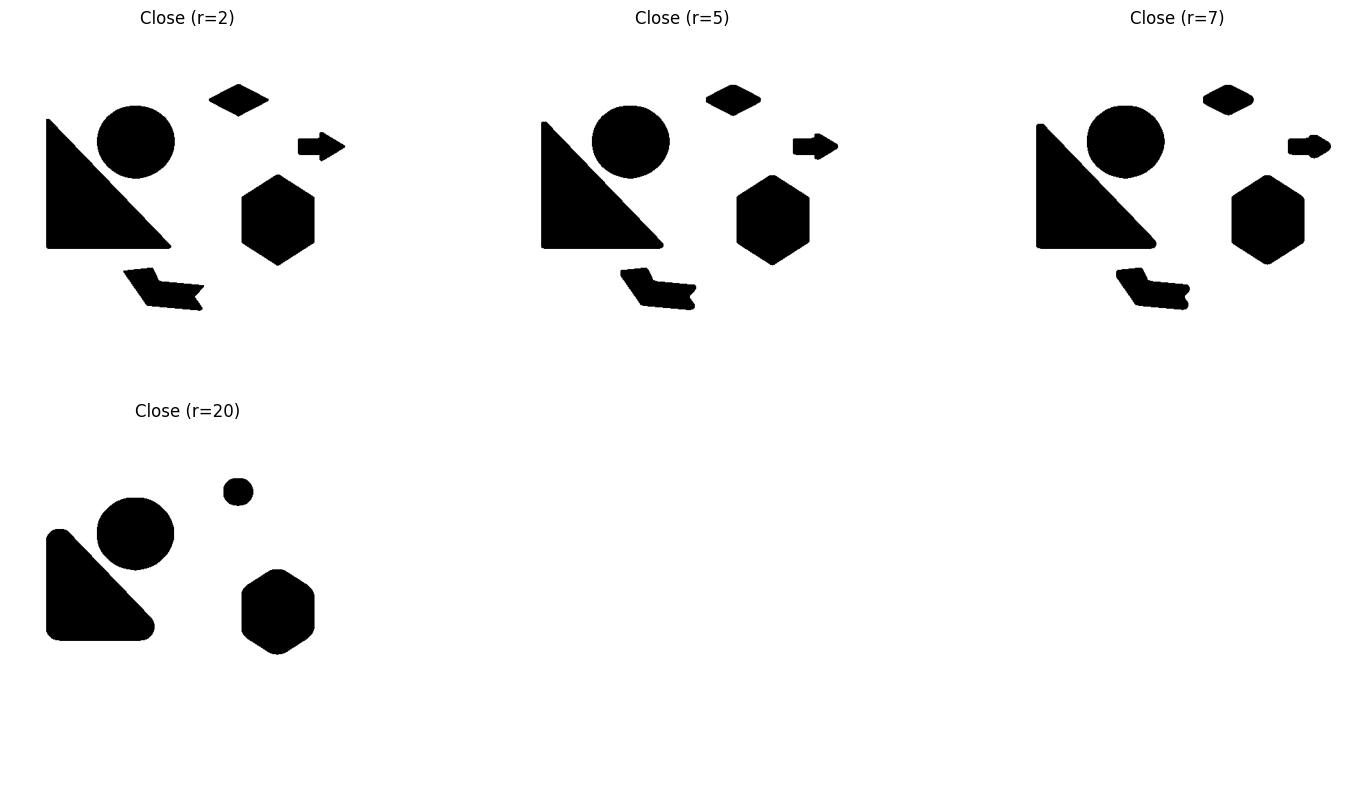

In [11]:
img = cv2.imread('./img/FIG_512.png', cv2.IMREAD_GRAYSCALE)
ret, img_bin = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

r_list = [2, 5, 7, 20]
output = []
for r in r_list:
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2 * r, 2 * r))
    img_close = cv2.morphologyEx(img_bin, cv2.MORPH_CLOSE, kernel)
    output.append(img_close)

plt.figure(figsize=(15, 8))
for i, img_close in enumerate(output, 1):
    plt.subplot(2, 3, i)
    plt.imshow(img_close, cmap='gray')
    plt.title(f'Close (r={r_list[i-1]})')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Erozja i Dylacja RGB

## Erozja dla RGB

$$
L'(m,n)=min_{m_i, n_i \in B(m,n)} (L(m_i,n_i))
$$

## Dylacja dla RGB

$$
L'(m,n)=max_{m_i, n_i \in B(m,n)} (L(m_i,n_i))
$$

## Zadanie 8 (2 punkty)
Proszę wykonać erozję i dylatacją na obrazie Leny (format RGB) z elementami strukturalnym:

$$
\begin{bmatrix} 
0 & 1 & 0 \\
1 & 1 & 1 \\
0 & 1 & 0
\end{bmatrix} 
$$



In [23]:
# zgodnie z dokumentacją metody cv2.erode i cv2.dilate działają zgodnie z powyższymi wzorami, tzn. działają na każdym kanale osobno

img = cv2.imread('./img/LENA_512.jpg')

kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype = np.uint8)
er_image = cv2.erode(img, kernel)
dil_image = cv2.dilate(img, kernel)

cv2.imshow("Img", img)
cv2.imshow("Erode", er_image)
cv2.imshow("Dilate",dil_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# poniżej zrzuty ekranu

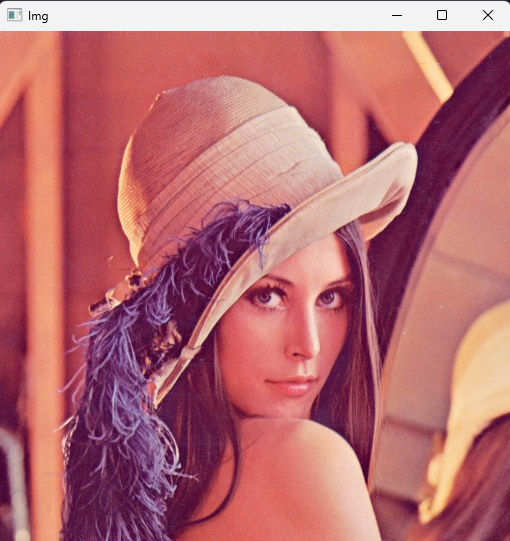

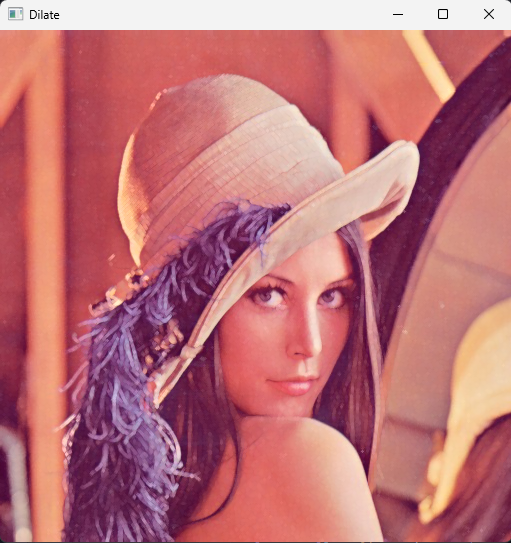

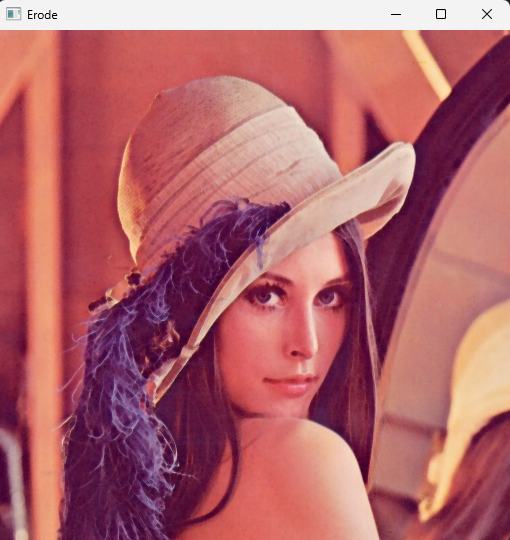